<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

**Kelompok 02 - Final Project 4 (Introduction to Python Kampus Merdeka)**<br>

Anggota Kelompok:

1. Aditya Gumilar<br>
PYTN-KS05-002

2. Nuur Ainii Kartika P<br>
PYTN-KS05-006

2. M Zhafran Bahij<br>
PYTN-KS05-008

## Project Introduction

***Project Overview***

*Project* ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu **Clustering**. Clustering adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam klaster yang sama lebih mirip satu sama lain daripada objek di klaster lain. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. PCA digunakan untuk mereduksi dimensi data yang diharapkan dapat memudahkan untuk melakukan interpretasi data dan pengelompokkan dalam klaster. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris yang dapat diakses [di sini](https://www.kaggle.com/arjunbhasin2013/ccdata). Objektif dari *project* ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (*transaction behaviour*) yang dijalankannya ke dalam beberapa klaster.

***Attribute Information:***
1. `CUSTID` - Identification of Credit Card holder (Categorical)
2. `BALANCE` - Balance amount left in their account to make purchases 
3. `BALANCEFREQUENCY` - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. `PURCHASES` - Amount of purchases made from account
5. `ONEOFFPURCHASES` - Maximum purchase amount done in one-go
6. `INSTALLMENTSPURCHASES` - Amount of purchase done in installment
7. `CASHADVANCE` - Cash in advance given by the user
8. `PURCHASESFREQUENCY` - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. `ONEOFFPURCHASESFREQUENCY` - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. `PURCHASESINSTALLMENTSFREQUENCY` - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. `CASHADVANCEFREQUENCY` - How frequently the cash in advance being paid
12. `CASHADVANCETRX` - Number of Transactions made with "Cash in Advance"
13. `PURCHASESTRX` - Number of purchase transactions made
14. `CREDITLIMIT` - Limit of Credit Card for user
15. `PAYMENTS` - Amount of Payment done by user
16. `MINIMUM_PAYMENTS` - Minimum amount of payments made by user
17. `PRCFULLPAYMENT` - Percent of full payment paid by user
18. `TENURE` - Tenure of credit card service for user


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib

from matplotlib import colors
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

## Load Dataset

In [ ]:
df_trans = pd.read_csv("https://raw.githubusercontent.com/adityagum/dataset/main/CC%20GENERAL.csv")
df = df_trans.copy()
print("Jumlah data:", len(df))
df.head()

Jumlah data: 8950


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Cleaning



**Di bagian ini** 
* Data Cleaning
* Feature Engineering 

Untuk mendapatkan pemahaman penuh tentang langkah-langkah apa yang harus kita ambil untuk membersihkan dataset.
Mari kita lihat informasi dalam data.

In [ ]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Melihat jumlah missing values disetiap atribut/kolom
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Mengecek data duplikat
df.duplicated().sum()

0

Terdapat missing values pada atribut credit_limit dan minimum_payment. Karena jumlah missing valuesnya tidak terlalu banyak, maka akan dilakukan proses pengisian missing values menggunakan nilai median

In [ ]:
df.CREDIT_LIMIT.fillna(value=df.CREDIT_LIMIT.median(), inplace=True)
df.MINIMUM_PAYMENTS.fillna(value=df.MINIMUM_PAYMENTS.median(), inplace=True)

In [ ]:
# Mengecek kembali missing values 
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Mengecek statistik untuk data numeric
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Eksplorasi Data Analysis

In [ ]:
# Membuat fungsi untuk memunculkan histogram masing-masing kolom
def plot_hist(feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')

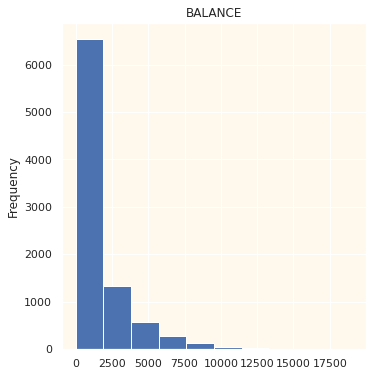

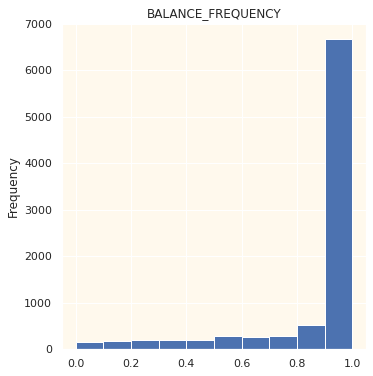

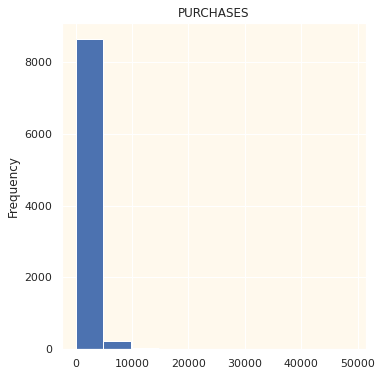

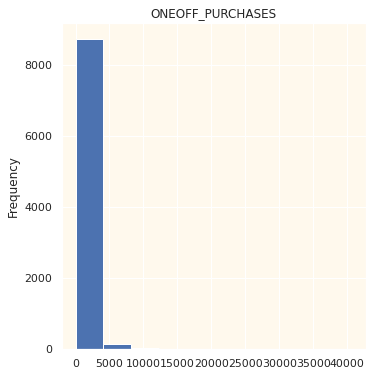

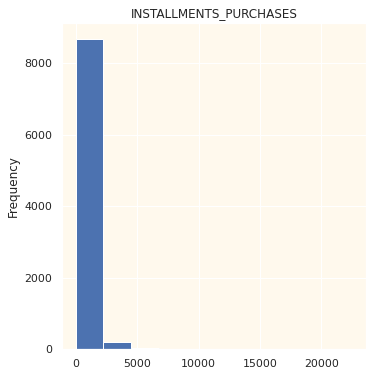

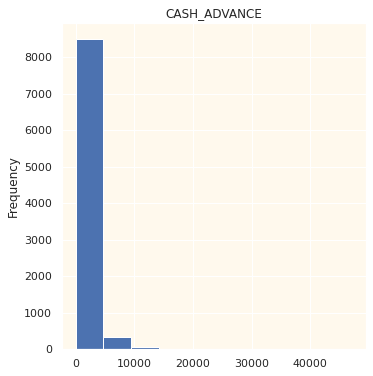

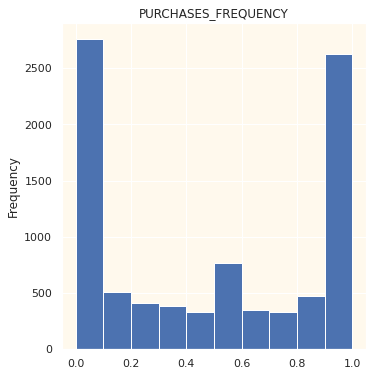

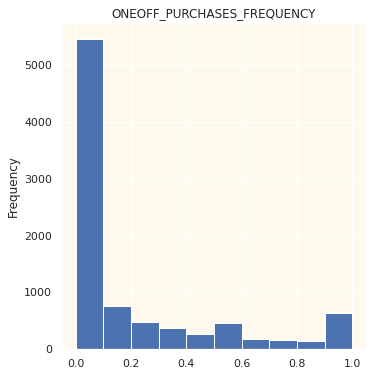

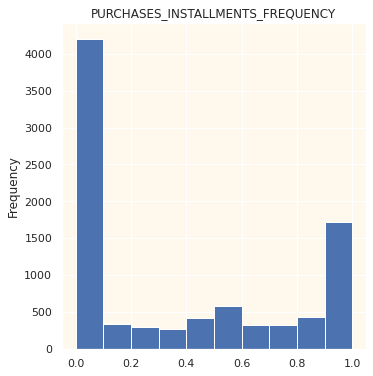

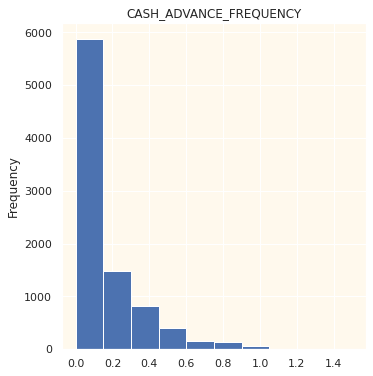

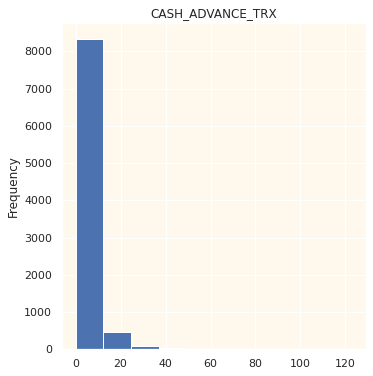

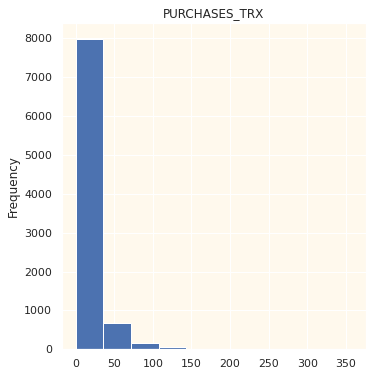

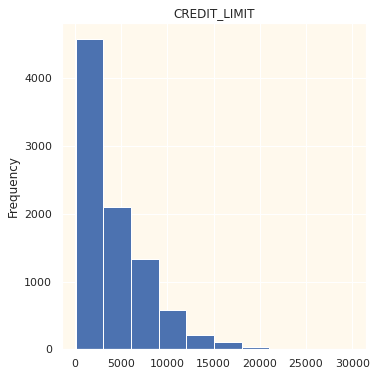

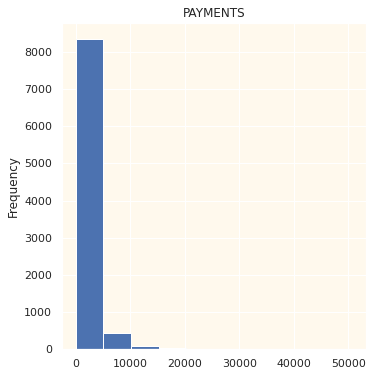

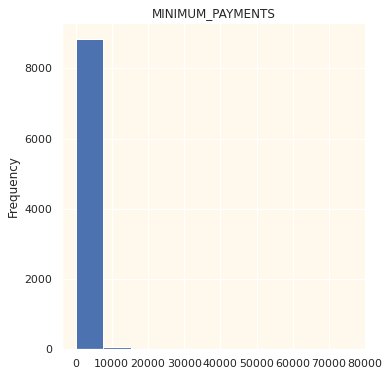

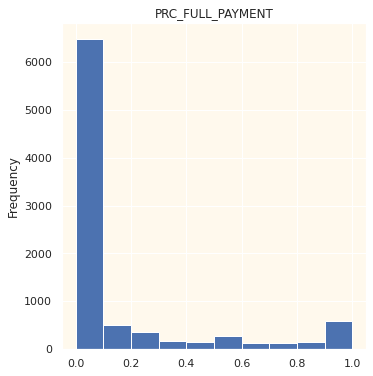

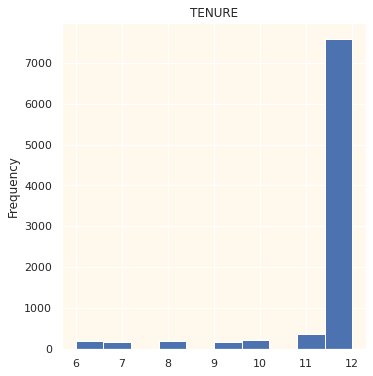

In [ ]:
# visualisasi distribusi frekuensi untuk kolom yg mengandung tipe data numeric
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    plot_hist(num_feature[i])

**Analisis**
* PURCHASES merupakan penjumlahan dari ONE_OFF_PURCHASES dan INSTALLMENTS_PURCHASES.
* TENURE memiliki mode 12 dan nilai maksimal 12.
* Frekuensi terbanyak BALANCE berada dinilai terendah sebaliknya Frekuensi terbanyak BALANCE_FREQUENCY berada dinilai tertinggi. 

**Kesimpulan**

Sebenarnya, bisa saja untuk tidak memasukkan kolom PURCHASES karena hal tersebut merupakan gabungan dari 2 kolom yang lain.

Nilai BALANCE tidak harus sesuai dengan kondisi BALANCE_FREQUENCY karena jumlah tabungan tidak harus selalu sama dengan berapa banyak perubahan tabungan. Berapa banyak perubahan tabungan bisa dari hasil pemasukan dan pengeluaran.

In [ ]:
# Korelasi antar kolom
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


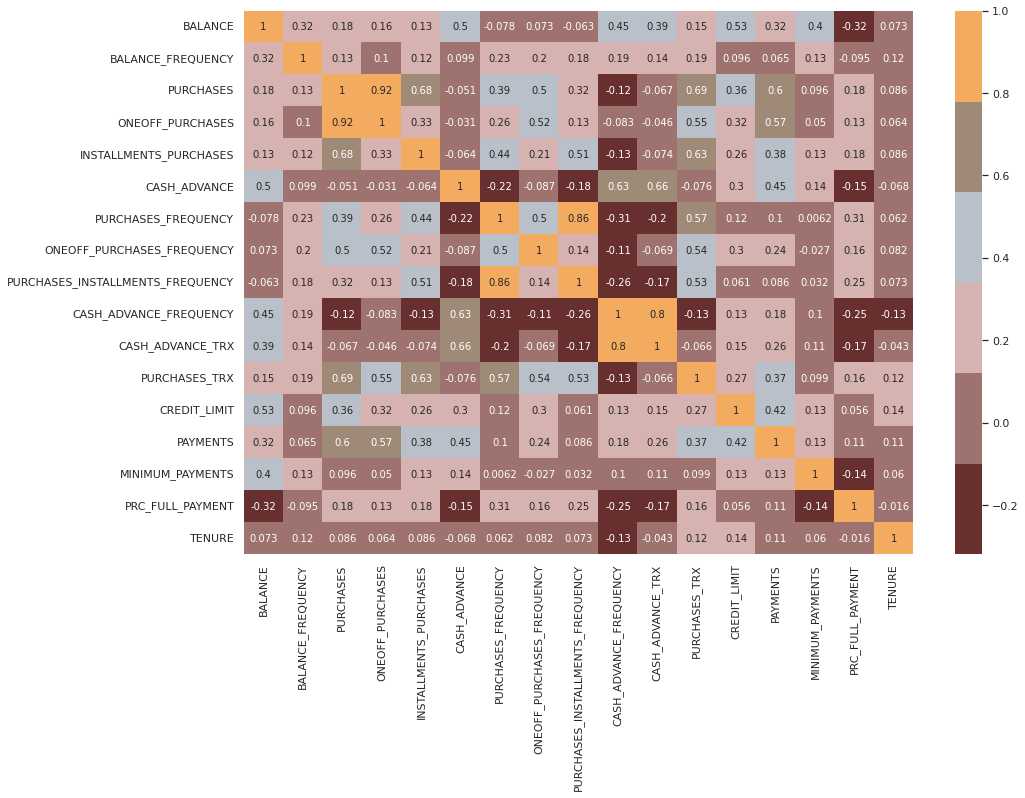

In [ ]:
# Visualisasi korelasi antar kolom
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap=cmap)

**Analisis**

* PURCHASES dan ONE_OFF_PURCHASES, PURCHASES_FREQUENCY dan INSTALLMENTS_PURCHASES , serta CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX memiliki nilai korelasi positif yang tinggi yaitu mencapa 0.79 ke atas.
* TENURE hampir tidak memiliki korelasi terhadap kolom-kolom lainnya karena nilai korelasi terhadap kolom lain ada di kisaran < 0.2 dan > -0.2 .

In [ ]:
df_corr = df.corr()
df_corr2 = df_corr[(df_corr['BALANCE'] > 0.30) | (df_corr['BALANCE'] < -0.30)]
df_corr2['BALANCE'].sort_values(ascending=False)

BALANCE                   1.000000
CREDIT_LIMIT              0.531296
CASH_ADVANCE              0.496692
CASH_ADVANCE_FREQUENCY    0.449218
MINIMUM_PAYMENTS          0.397920
CASH_ADVANCE_TRX          0.385152
PAYMENTS                  0.322802
BALANCE_FREQUENCY         0.322412
PRC_FULL_PAYMENT         -0.318959
Name: BALANCE, dtype: float64




**Kesimpulan**


Untuk BALANCE, ia berkorelasi cukup tinggi dengan  CREDIT_LIMIT, CASH_ADVANCE,CASH_ADVANCE_FREQUENCY, dan MINIMUM_PAYMENTS .






## Data Preprocessing

In [ ]:
#dilakukan drop pada kolom CUST_ID karena bertipe data kategori
df.drop('CUST_ID', axis=1, inplace=True)

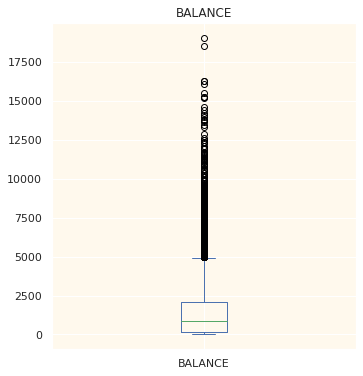

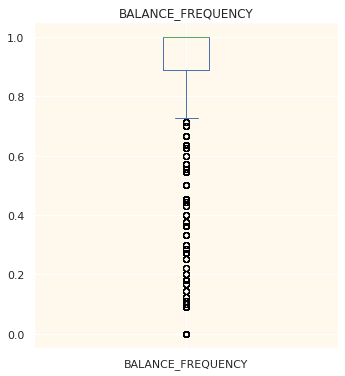

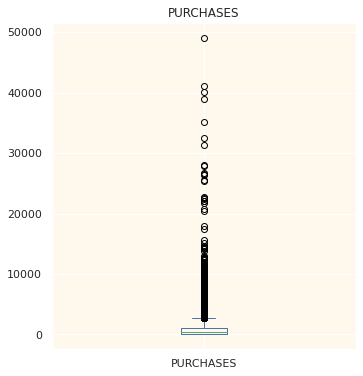

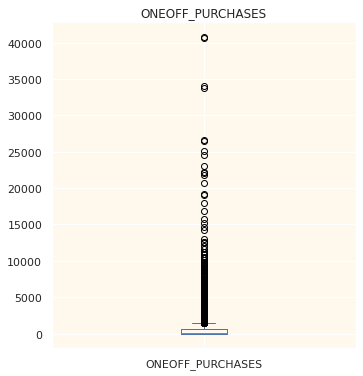

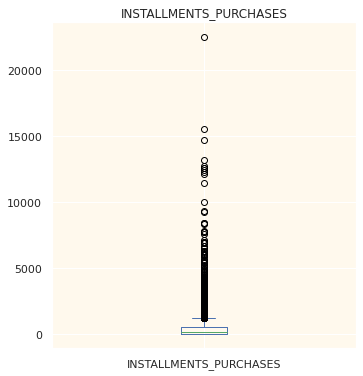

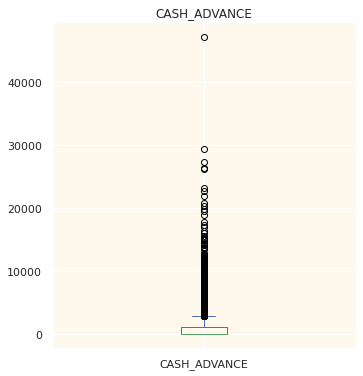

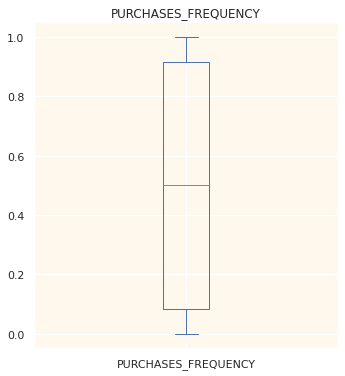

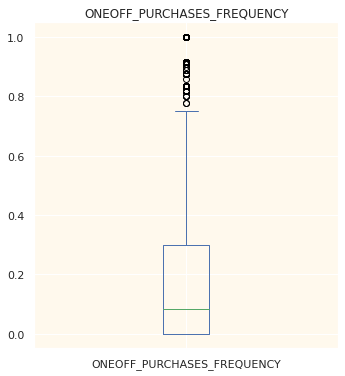

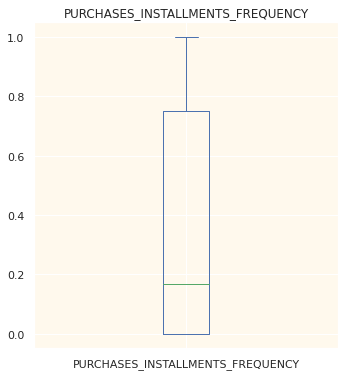

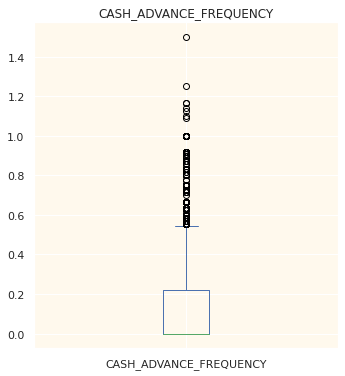

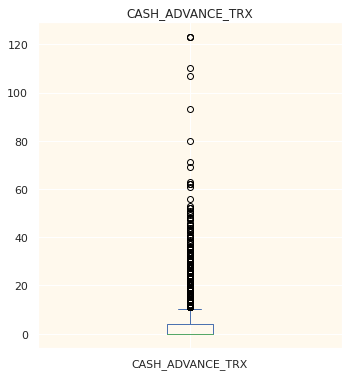

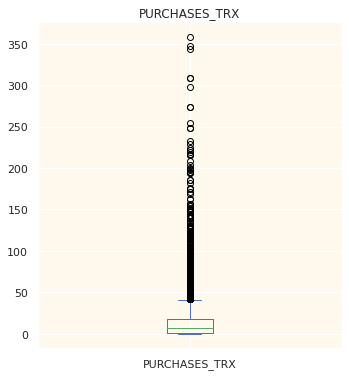

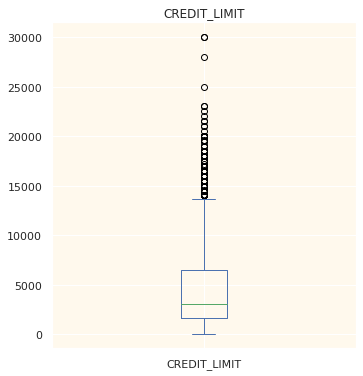

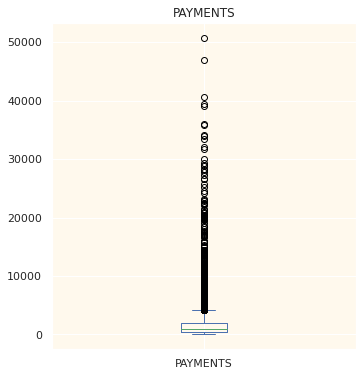

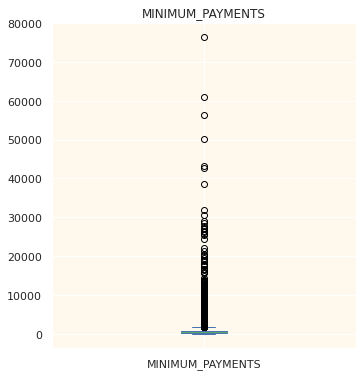

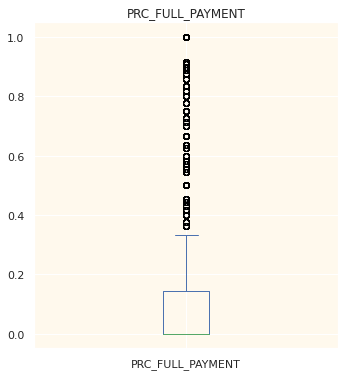

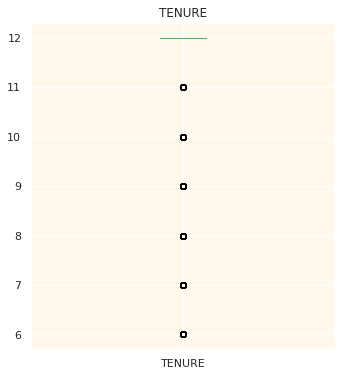

In [ ]:
# Membuat fungsi untuk memunculkan boxplot masing-masing kolom
def plot_box(feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')

num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    plot_box(num_feature[i])

Sebelumnya telah diketahui bahwa data memiliki banyak *outlier* dan bukan solusi yang baik untuk menghilangkan *outlier* tersebut, sehingga data akan dilakukan standarisasi menggunakan StandardScaler untuk menghasilkan distribusi Normal

In [ ]:
#Scaling
scaling = StandardScaler()
scaling.fit(df)
scaling_df = pd.DataFrame(scaling.transform(df),columns= df.columns )
print("Semua fitur sekarang sudah diskalakan")

Semua fitur sekarang sudah diskalakan


In [ ]:
# Data yang diskalakan untuk digunakan untuk mengurangi dimensi/reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaling_df.head()

Dataframe to be used for further modelling:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


**Setelah dilakukan scaling, dataset memiliki rentang nilai yang tidak terlalu jauh. Selain itu, dengan digunakannya scalling adalah untuk meminimalisir terjadinya outlier**

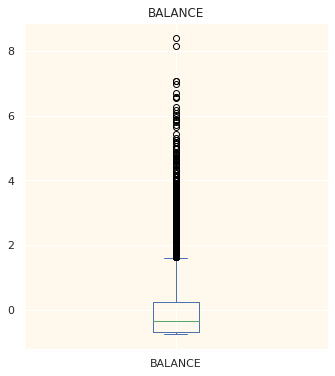

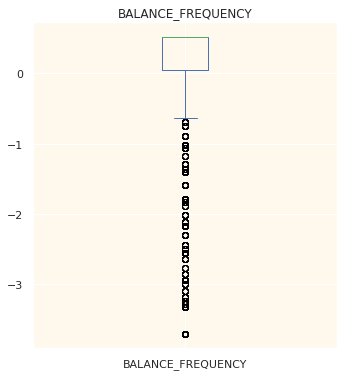

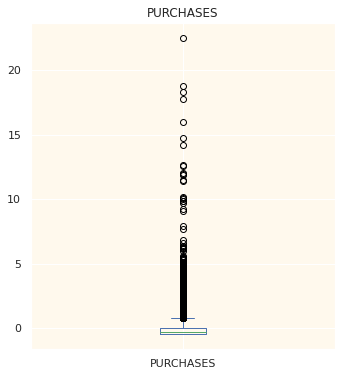

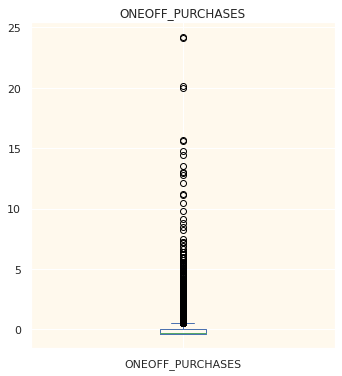

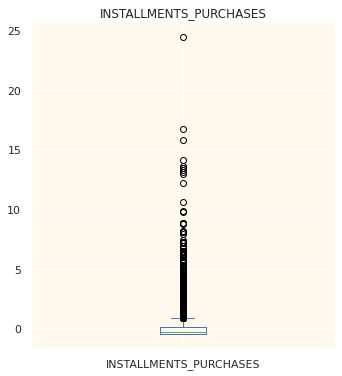

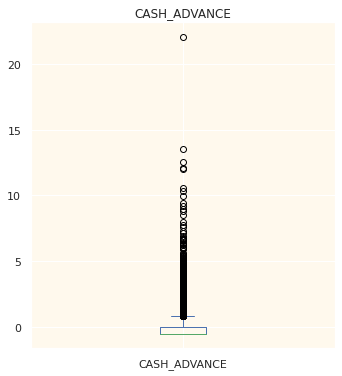

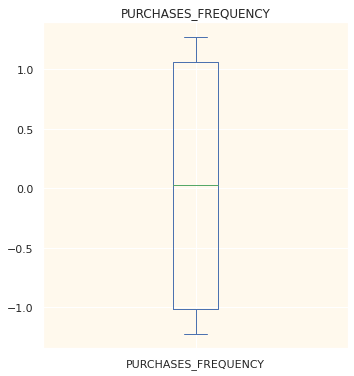

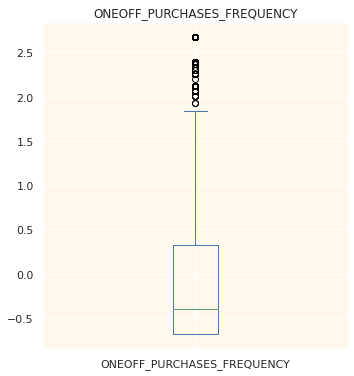

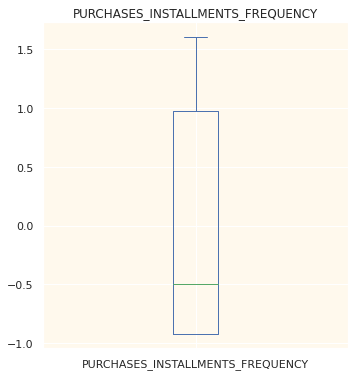

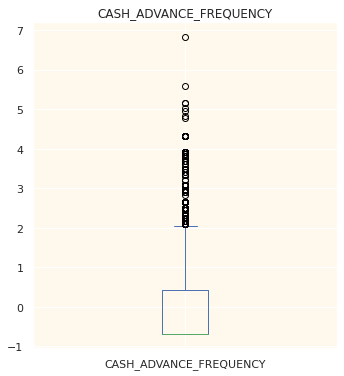

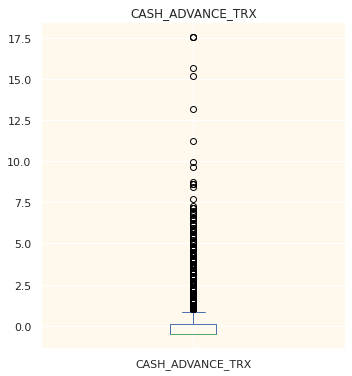

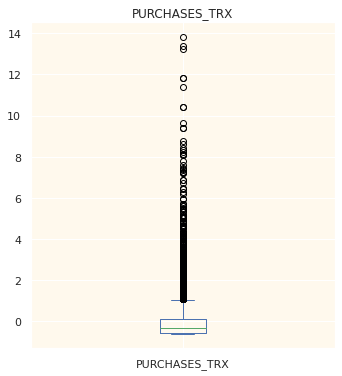

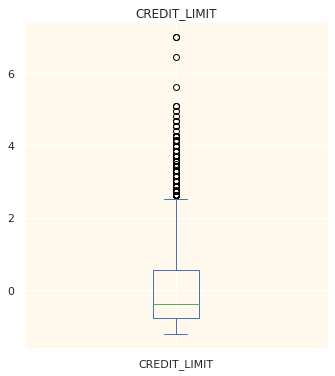

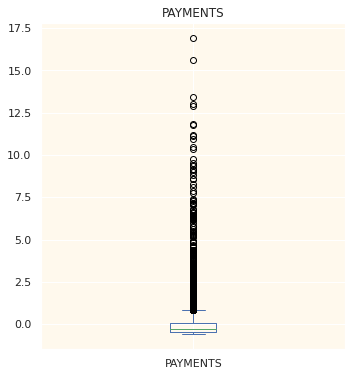

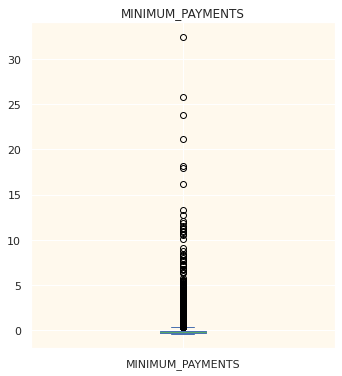

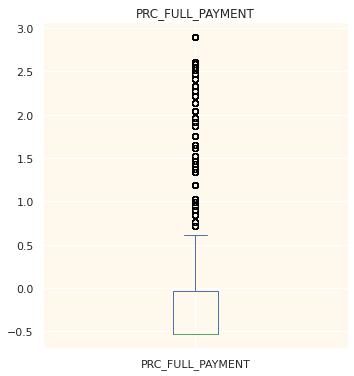

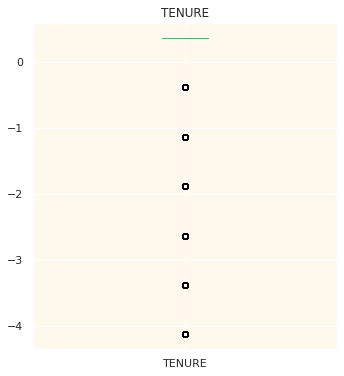

In [ ]:
num_feature = scaling_df.select_dtypes(exclude='object')

for i in num_feature.columns:
    plot_box(num_feature[i])

### PCA

<a id="5"></a>
<p style="background-color:682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>

Dalam masalah ini, ada banyak faktor yang menjadi dasar klasifikasi akhir akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur ini berkorelasi, dan karenanya berlebihan/redundant. Inilah sebabnya mengapa kita akan melakukan pengurangan dimensi pada fitur yang dipilih sebelum menempatkannya melalui pengklasifikasi.
*Pengurangan dimensi/Dimensionality reduction adalah proses mengurangi jumlah variabel acak yang dipertimbangkan, dengan memperoleh satu set variabel utama.*

**Principal component analysis (PCA)** adalah teknik untuk mengurangi dimensi kumpulan data tersebut, meningkatkan kemampuan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

**Langkah - langkah pada bagian ini:**
* Pengurangan dimensi dengan PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

Untuk kasus ini, kita akan mengurangi dimensi menjadi 2.

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaling_df)
PCA_ds = pd.DataFrame(pca.transform(scaling_df), columns=(["Principal Component 1", "Principal Component 2"]))
PCA_ds.head()

,Principal Component 1,Principal Component 2
0,-1.683649,-1.072242
1,-1.134085,2.509148
2,0.969395,-0.383575
3,-0.888220,0.004648
4,-1.600021,-0.683795


In [ ]:
pca.explained_variance_ratio_

array([0.27297671, 0.2031378 ])

<a id="6"></a>
 <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Sekarang kita telah mengurangi atribut menjadi dua dimensi, kita akan melakukan pengelompokan melalui elbow method

**Langkah-langkah yang dilakukan dalam Clustering**
* Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
* Memeriksa cluster yang terbentuk melalui scatter plot

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


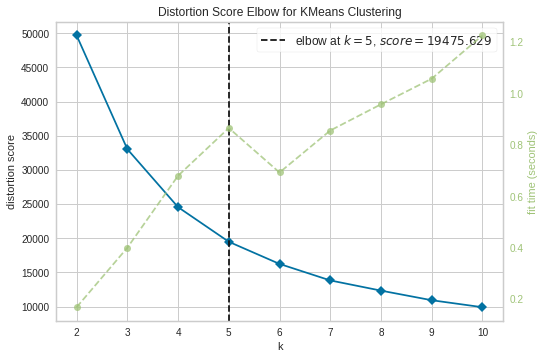

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(PCA_ds)
Elb.show()

Berdasarkan visualisasi elbow method, Nilai K paling optimal adalah 5. Dengan begitu, jumlah cluster terbentuk sebanyak 5 

### Pemodelan K-Means Clustering

In [ ]:
X = scaling_df

In [ ]:
# Mendefinisikan model kmeans dengan jumlah klaster sebanyak 5
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)

In [ ]:
# Fitting data scaled dengan model K-means
kmeans.fit(X)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(5, 17)

**Terdapat 5 klaster pada 17 atribut yang digunakan**

## Evaluasi Model

In [ ]:
# Mencari nilai rata-rata setiap cluster
cls_avg = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cls_avg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198396,4.783704,1.088198,0.824001,0.334613
1,0.158653,0.431358,0.896181,0.840422,0.574939,-0.298137,1.080315,1.782363,0.556321,-0.384338,-0.306754,1.159997,0.682020,0.360735,-0.009207,0.382944,0.276932
2,-0.441404,0.105639,-0.096115,-0.256440,0.243816,-0.381893,0.912194,-0.398972,1.080896,-0.485297,-0.372129,0.077893,-0.356042,-0.275619,-0.074860,0.403708,-0.046513
3,1.466551,0.382502,-0.238739,-0.174952,-0.243170,1.737917,-0.522707,-0.241364,-0.458500,1.776962,1.670580,-0.295369,0.839270,0.641413,0.504785,-0.402845,-0.102454
4,-0.246779,-0.339398,-0.339031,-0.220898,-0.395667,-0.171390,-0.814682,-0.353873,-0.751613,-0.082293,-0.152860,-0.473096,-0.316631,-0.251299,-0.123040,-0.283943,-0.046351


In [ ]:
# Lakukan invers pada data yang telah di standarisasi untuk memahami karakter dari data dan setiap kolom
cls_avg_invers = scaling.inverse_transform(cls_avg)
cls_avg_invers = pd.DataFrame(data = cls_avg,columns = [df.columns])
cls_avg_invers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198396,4.783704,1.088198,0.824001,0.334613
1,0.158653,0.431358,0.896181,0.840422,0.574939,-0.298137,1.080315,1.782363,0.556321,-0.384338,-0.306754,1.159997,0.682020,0.360735,-0.009207,0.382944,0.276932
2,-0.441404,0.105639,-0.096115,-0.256440,0.243816,-0.381893,0.912194,-0.398972,1.080896,-0.485297,-0.372129,0.077893,-0.356042,-0.275619,-0.074860,0.403708,-0.046513
3,1.466551,0.382502,-0.238739,-0.174952,-0.243170,1.737917,-0.522707,-0.241364,-0.458500,1.776962,1.670580,-0.295369,0.839270,0.641413,0.504785,-0.402845,-0.102454
4,-0.246779,-0.339398,-0.339031,-0.220898,-0.395667,-0.171390,-0.814682,-0.353873,-0.751613,-0.082293,-0.152860,-0.473096,-0.316631,-0.251299,-0.123040,-0.283943,-0.046351


In [ ]:
# Menambahkan kolom cluster pada dataframe
df_clusters = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


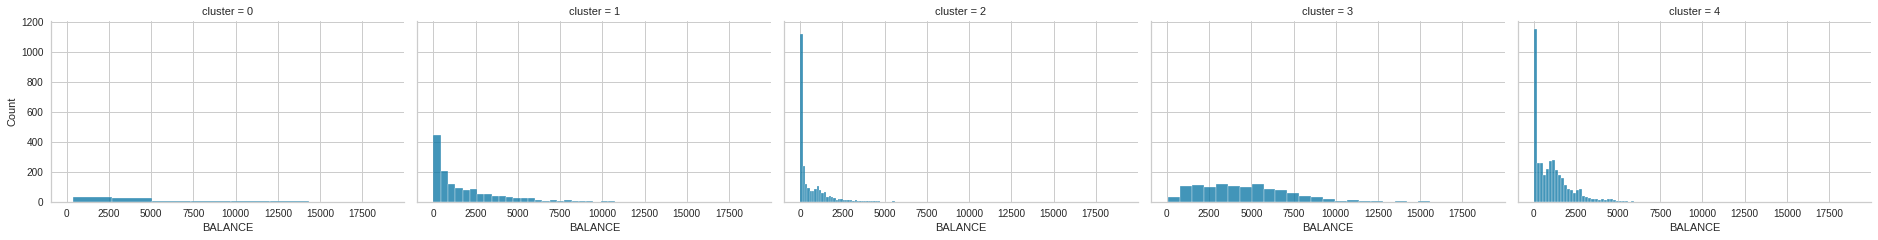

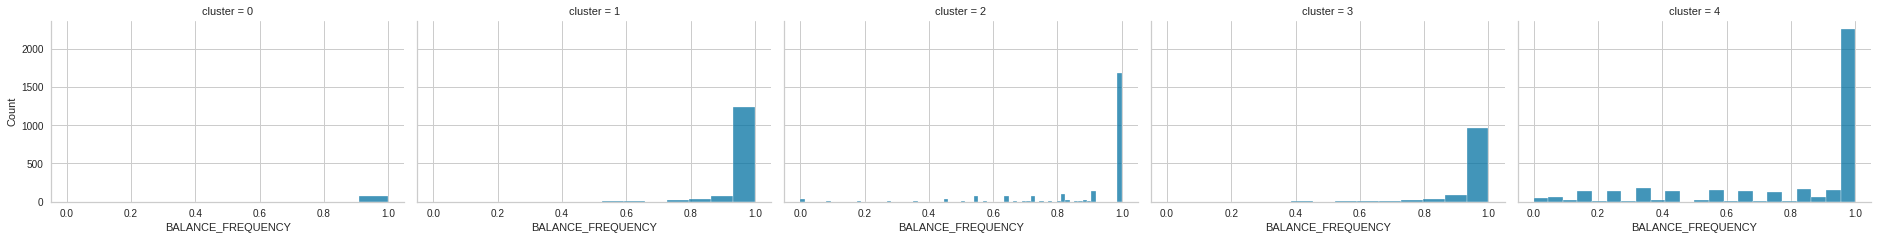

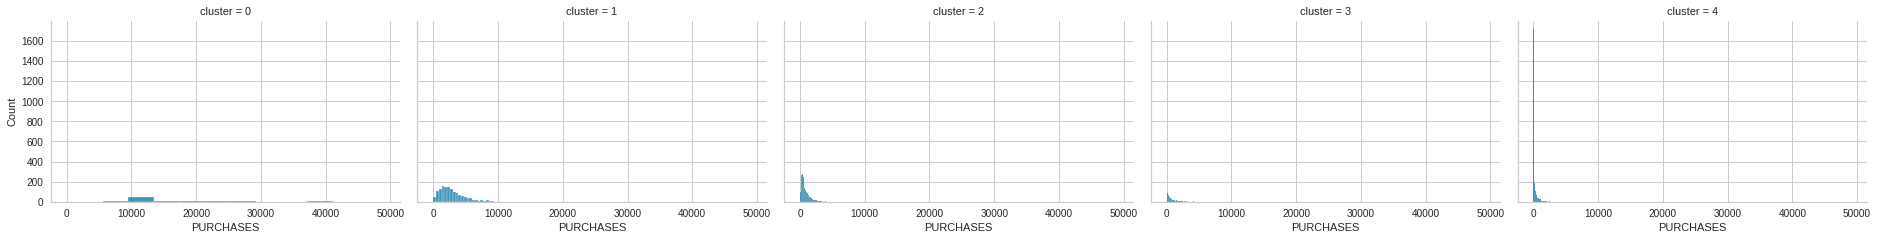

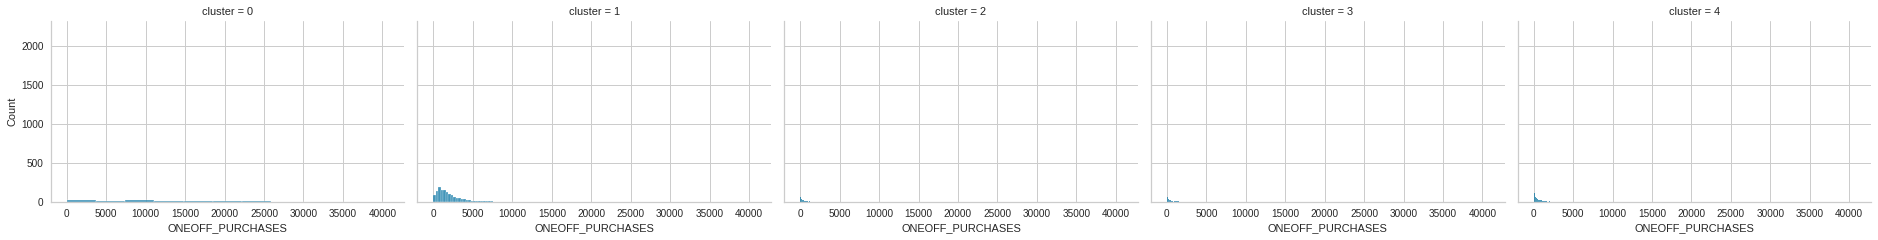

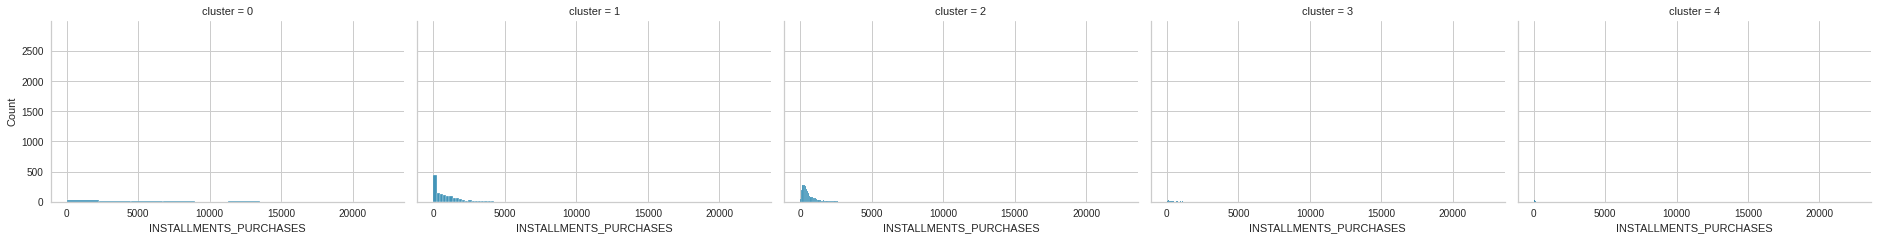

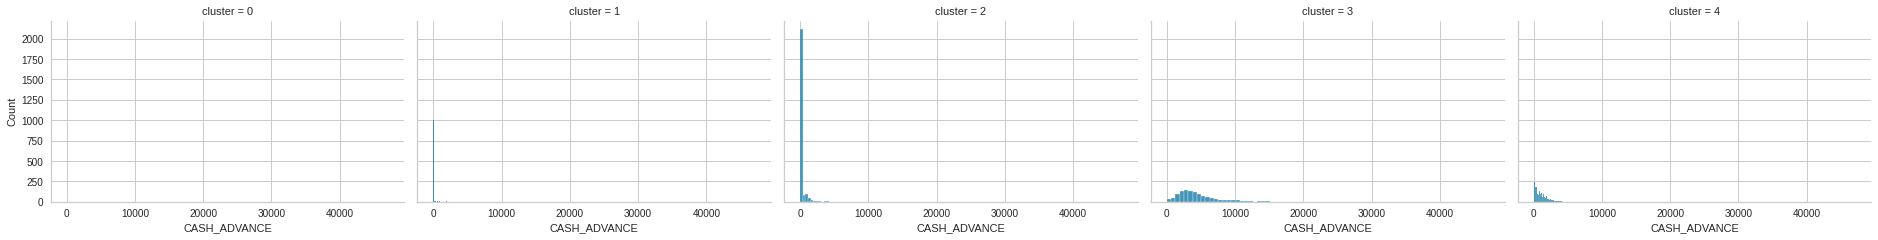

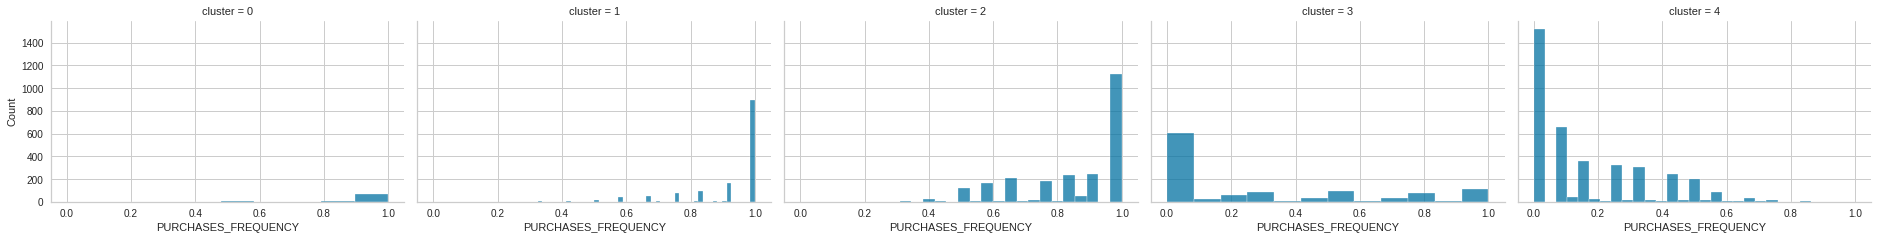

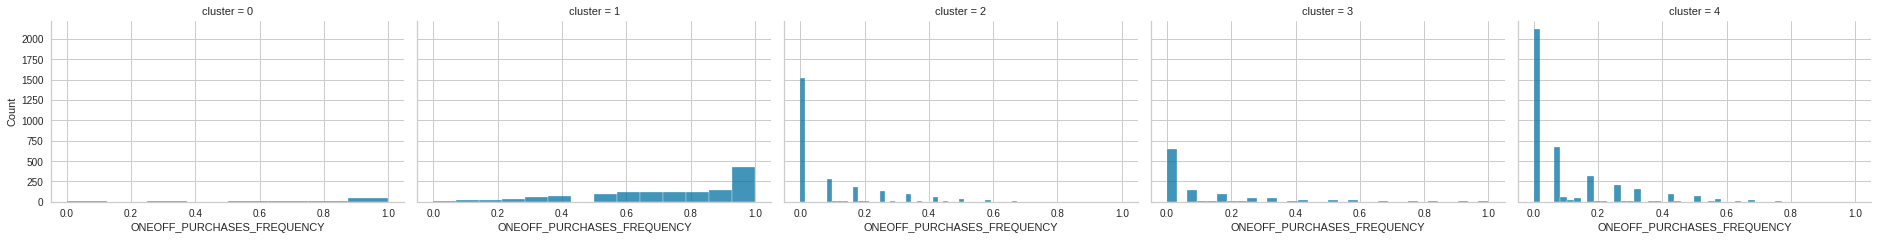

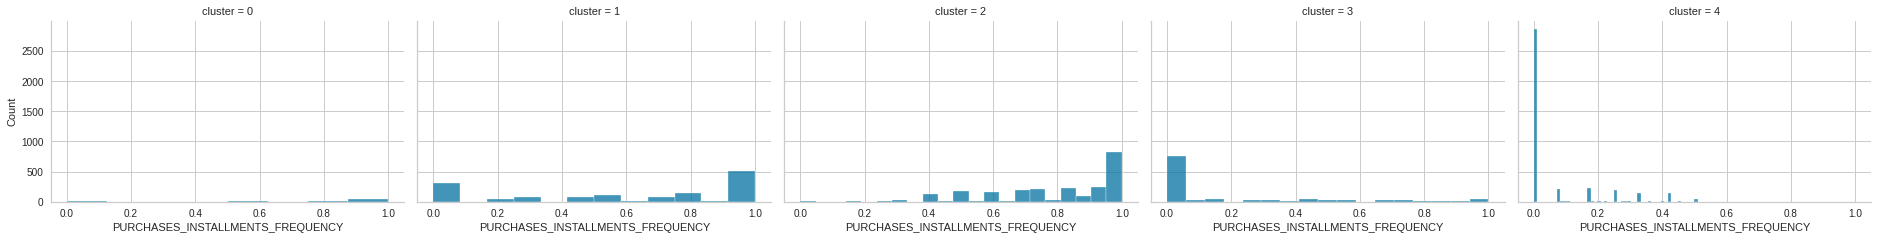

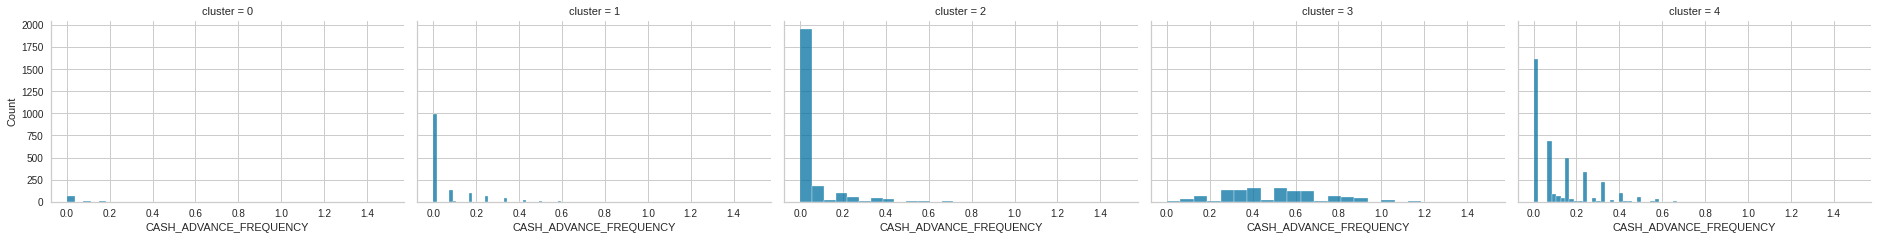

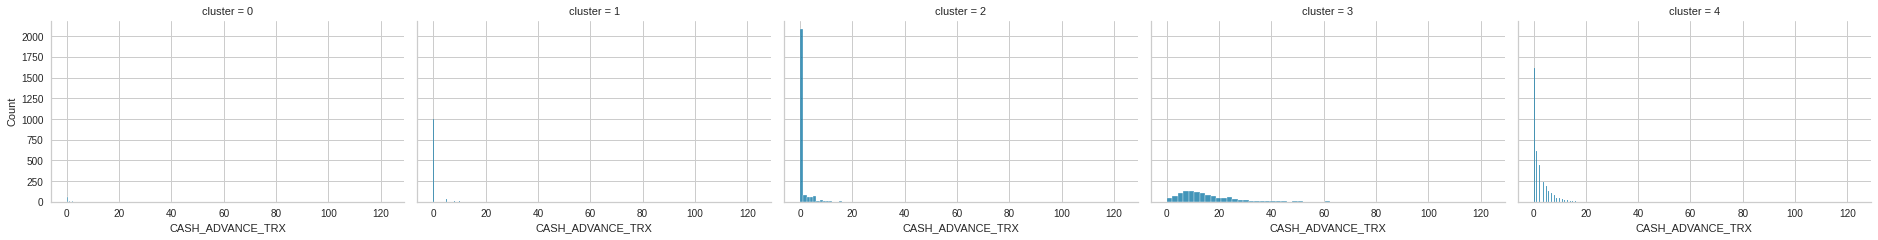

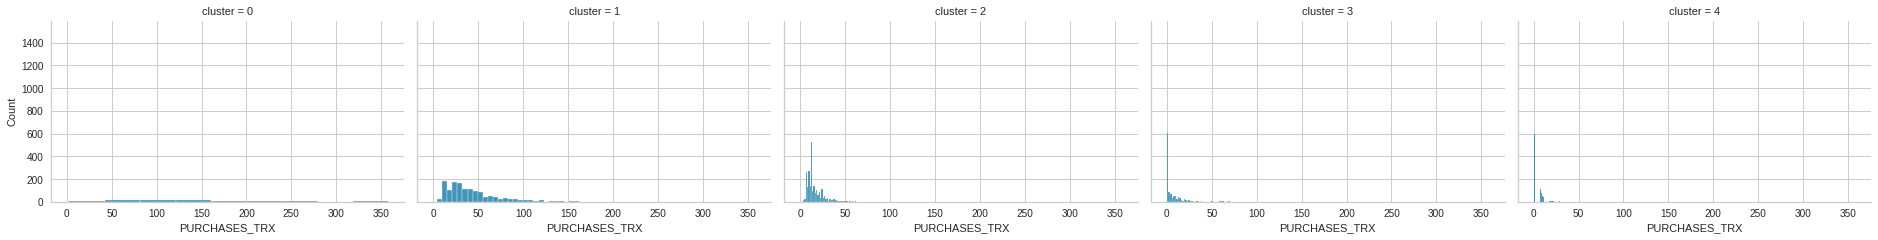

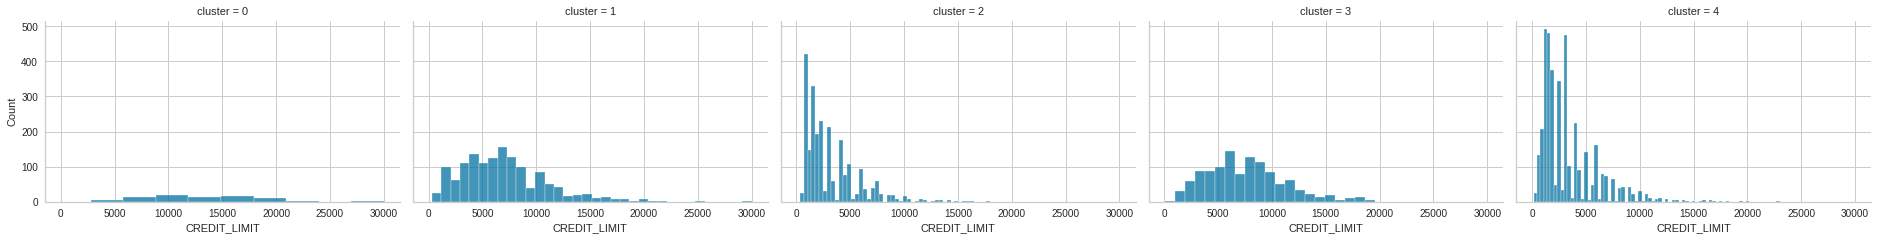

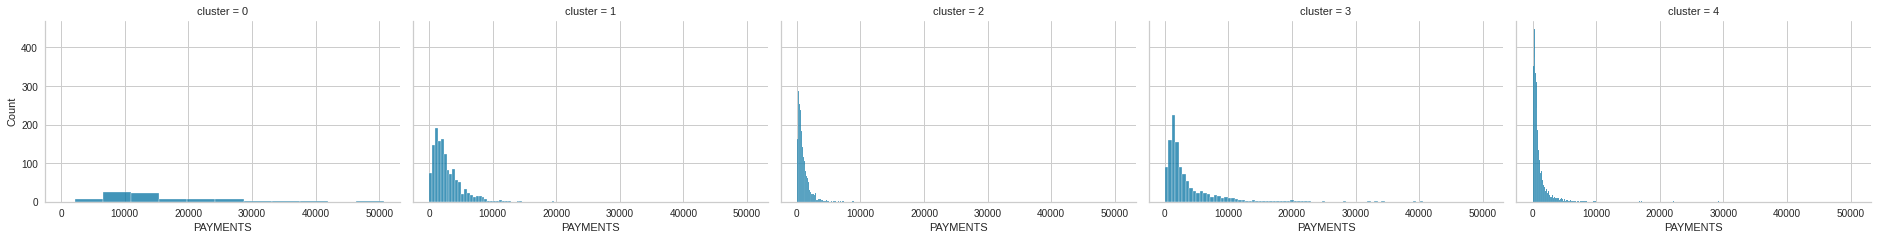

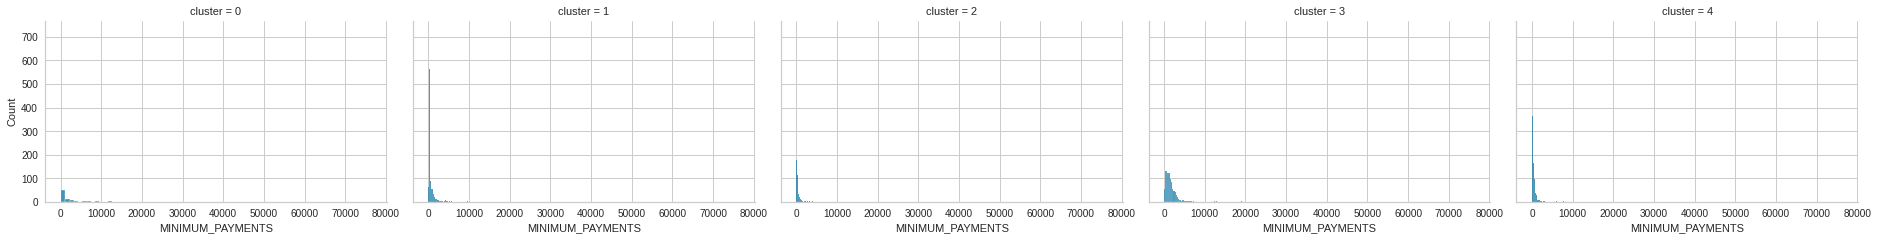

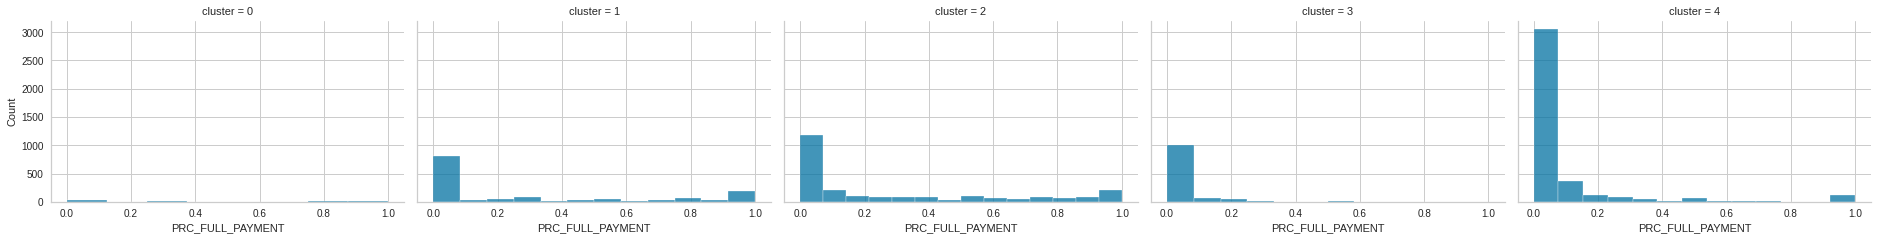

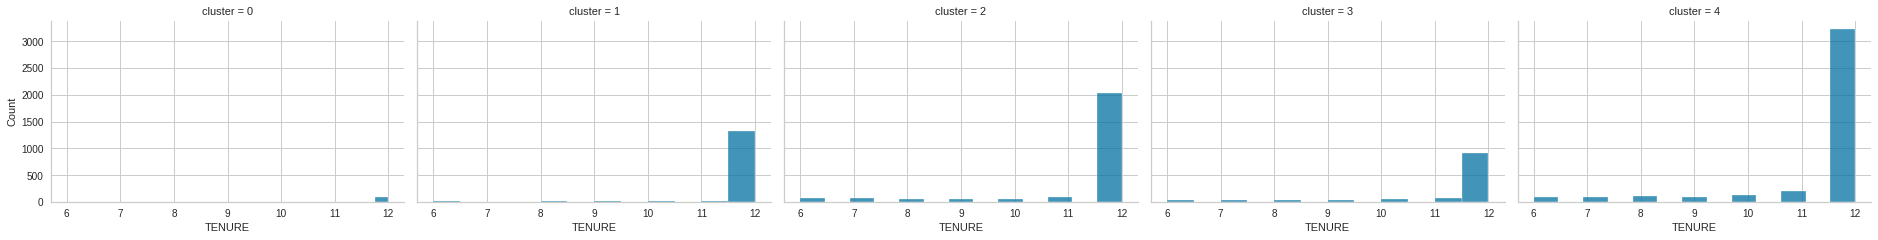

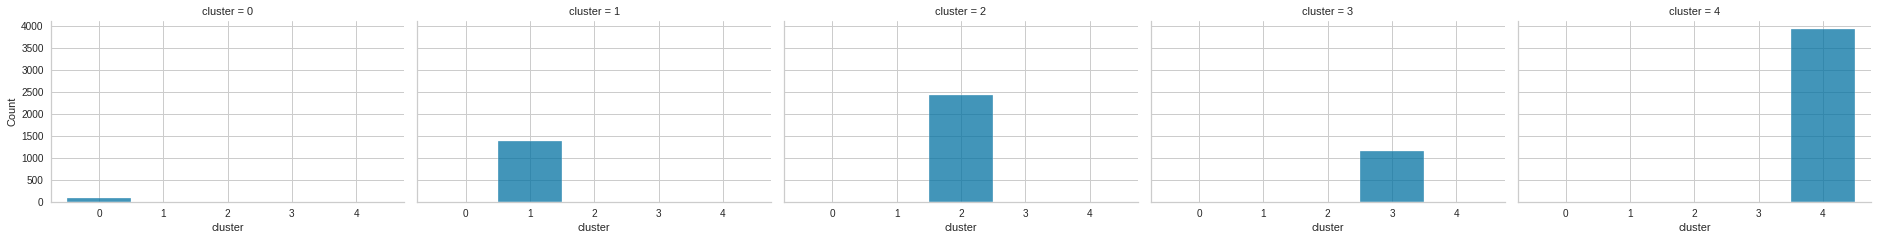

In [ ]:
for i in df_clusters:
    g = sns.FacetGrid(df_clusters, col='cluster', height=3.5, aspect=1.5)
    g.map(sns.histplot, i)

**Dapat ditarik kesimpulan bahwa masing-masing cluster memiliki karateristik yang berbeda, yaitu diantaranya:**

Cluster 0 = Pengguna lebih sering memperbaharui isi saldo, melakukan pembelian dan transaksi pembayaran, sehingga limit kreditnya kecil


Cluster 1 = Pengguna sangat jarang memperbaharui isi saldo, tidak sering melakukan transaksi pembelian dan memiliki limit kredit rata-rata


Cluster 2 = pengguna cukup sering memperbaharui isi saldo, memiliki jumlah pembelian paling tinggi, sering melakukan transaksi pembelian, memiliki rata-rata jumlah transaksi dengan cash in advance, memiliki jumlah transaksi pembelian cukup tinggi dan memiliki limit kredit seimbang.


Cluster 3 = pengguna sangat sering memperbaharui isi saldo, jumlah pembelian yang tidak terlalu tinggi, tidak sering melakukan pembelian, jumlah transaksi cukup tinggi, jumlah pembayaran yang dilakukan pengguna cukup sering, dan limit kredit pengguna sangat tinggi


Cluster 4 = pengguna cukup sering memperbaharui isi saldo, jumlah pembelian sangat tinggi, frekuensi pembelian sering dilakukan, jumlah transaksi pembelian sangat tinggi, jumlah pembayaran yang dilakukan pengguna cukup tinggi, dan limit kredit pengguna sangat tinggi, dan limit kredit pengguna cukup tinggi.

In [ ]:
# Jumlah setiap cluster
df_clusters['cluster'].value_counts()

4    3913
2    2416
1    1383
3    1152
0      86
Name: cluster, dtype: int64

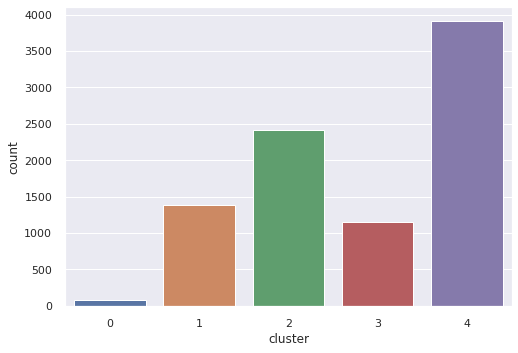

In [ ]:
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="cluster", data=df_clusters)

Setelah terbentuk 5 klaster, kita akan menambahkan label klaster ke dalam PCA_ds

In [ ]:
# Menambahkan kolom klaster dengan mengambil data dari labels

PCA_ds['Cluster'] = labels
PCA_ds.head()

,Principal Component 1,Principal Component 2,Cluster
0,-1.683649,-1.072242,4
1,-1.134085,2.509148,3
2,0.969395,-0.383575,1
3,-0.888220,0.004648,4
4,-1.600021,-0.683795,4


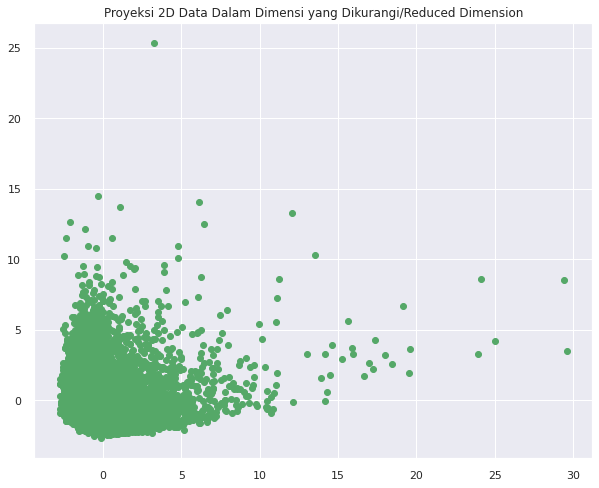

In [ ]:
# Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x = PCA_ds["Principal Component 1"]
y = PCA_ds["Principal Component 2"]

# plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c='g' , marker="o" )
ax.set_title("Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension")
plt.show()

**Plot diatas merepresentasikan persebaran jumlah setiap cluster**

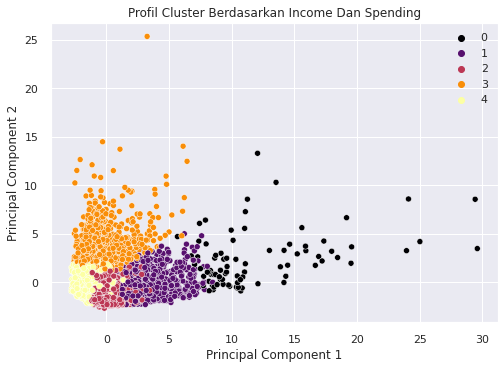

In [ ]:
pl = sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue = "Cluster", data = PCA_ds, palette='inferno')
pl.set_title("Profil Cluster Berdasarkan Income Dan Spending")
plt.legend()
plt.show()

**Plot diatas berbeda dengan plot sebelumnya, karena pada scatter plot ini setiap cluster memiliki warna yang berbeda. Dengan begitu, kita lebih mudah unutk melakukan analisisnya.**

## Model Inference

Tampilkan data yang telah ditambahkan kolom cluster, untuk dilakukan pengujian model

In [ ]:
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


misalnya kita memasukan data pada baris 1 atau index ke 0

In [ ]:
blnc                = float(input('Balance:'))
blnc_frq            = float(input('Balance Frequency:'))
prchs               = float(input('Purchases Amount:'))
oneoff_prchs        = float(input('ONEOFF Purchases Amount:'))
instal_prchs        = float(input('Installment Purchases Amount:'))
cash_advance        = float(input('Cash Advance Amount:'))
prchs_frq           = float(input('Purchases Frequency:'))
oneoff_prchs_frq    = float(input('ONEOFF Purchases Frequency:'))
instal_prchs_frq    = float(input('Installment Purchases Frequency:'))
cash_advance_frq    = float(input('Cash Advance Frequency:'))
cash_advance_trx    = float(input('Number of Cash Advance Transaction:'))
prchs_trx           = float(input('Number of Purchases Transaction:'))
credit_limit        = float(input('Credit Limit Amount:'))
payments            = float(input('Payment Amount:'))
min_payments        = float(input('Minimum Payments Amount:'))
prc_full_payments   = float(input('Percentage of Full Payments:'))
tenure              = float(input('Tenure:'))

val = [blnc, blnc_frq, prchs, oneoff_prchs, instal_prchs, cash_advance, prchs_frq, oneoff_prchs_frq, instal_prchs_frq, cash_advance_frq, cash_advance_trx,
      prchs_trx, credit_limit, payments, min_payments, prc_full_payments, tenure]

val = scaling.transform([val])

print('Input values:', val)

val_predict = kmeans.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam klaster {}'.format(val_predict))
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
elif val_predict == 3:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
elif val_predict == 4:
    print('Pengguna termasuk ke dalam klaster {}, '.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')

KeyboardInterrupt: ignored

## Conlcusion

Kesimpulannya adalah di dataset ini, cukup efisien jika dibuat 5 klaster. Sebelum dibuat klaster, kita melakukan namanya PCA untuk mereduksinya menjadi dua dimensi. Namun, hampir setengah informasi terbuang dalam proses ini. Setelah itu baru melakukan klaster dan terbentuklah 5 klaster.

## Save Model

In [ ]:
joblib_file_dir = open("model_kmeans.joblib", "wb")

joblib.dump(kmeans, joblib_file_dir)
joblib_file_dir.close()

In [ ]:
joblib_file_dir = open("scaling.joblib", "wb")

joblib.dump(scaling, joblib_file_dir)
joblib_file_dir.close()